In [1]:
""" 
Ordered response + PCA
"""

' \nOrdered response + PCA\n'

Motivation

* Female and male body status may be related to different features, hence may be related to different embedding axes. The embedding axes may change order for males and females. In this simulation, we assume the embedding axis 1 for females corresponds to the embedding axis 2 for males, and the embedding axis 2 for males corresponds to the embedding axis 1 for females.

* Using the model trained by males, does transporting female embedding onto male embedding help with female predictinons?

Simulation

* Suppose the embedding dimension is 2.

* $r$ for indexing domains

* Let $N$ be the total number of training data, $N_{s}$ be the number of data in the source domain, $N_{t}$ be the number of data in the target domain. $N'$ be the number of test data.

* Sample $\beta_{s1} = \beta_{t2} \sim \operatorname{Gaussian}\left(0,1\right)$, $\beta_{s2} = \beta_{t1} \sim \operatorname{Gaussian}\left(50,1\right)$

* Pick function $g$ from sigmoid, identify function, natural log function. Let $f(L_1, L_2) = g(\beta_1 L_1 + \beta_2 L_2) + \epsilon$

* Simulate $X_s  = [X_{s1}, X_{s2}] \sim \operatorname{MVN}\left(\mu_s, \Sigma_s\right)$

* Simulate $Y_s = g(\beta_{s1} X_{s1} + \beta_{s2} X_{s2}) + \epsilon$

* Simulate $X_t  = [X_{t1}, X_{t2}] \sim \operatorname{MVN}\left(\mu_t, \Sigma_t\right)$

* Simulate $Y_t = g(\beta_{t1} X_{t1} + \beta_{t2} X_{t2}) + \epsilon$


Expectation:

* After transportation, axis 1 in the source embedding space corresponds to axis 2 in the target embedding space, and axis 2 in the source embedding space corresponds to axis 1 in the target embedding space.

* Tranporting source embedding onto target embedding space helps with source data prediction using the model trained by target data.



In [2]:
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
import ot
import ot.plot

(50, 2)
(50, 2)
(50, 2)


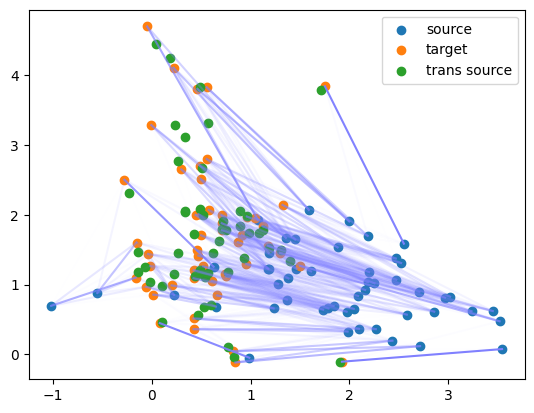

In [3]:
"""
Simple transport experiments 
"""
num_points = 50

mu = 2
sigma = 1
source_x = normal(mu, sigma, size=num_points)
mu = 1
sigma = 0.5
source_y = normal(mu, sigma, size=num_points)
source = np.column_stack((source_x, source_y))
print(source.shape)
pl.scatter(source_x, source_y, label="source")

mu = 0.5
sigma = 0.5
target_x = normal(mu, sigma, size=num_points)
mu = 2
sigma = 1
target_y = normal(mu, sigma, size=num_points)
target = np.column_stack((target_x, target_y))
print(target.shape)
pl.scatter(target_x, target_y, label="target")

ot_emd = ot.da.SinkhornTransport(reg_e=1e-1)
# ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=source, Xt=target)
trans_source = ot_emd.transform(Xs=source)
print(trans_source.shape)
ot.plot.plot2D_samples_mat(source, target, ot_emd.coupling_, c=[.5, .5, 1])

pl.scatter(trans_source[:,0], trans_source[:, 1], label="trans source")
pl.legend()
pl.show()